In [1]:
import tensorflow as tf
import keras as k

from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

# chestii de DL
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD, RMSprop, Adam
from keras.models import Sequential
from keras.utils import np_utils

/home/merlin/.virtualenvs/dl4cv/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# calea catre fisierul mnist
print("calea catre mnist: ",mnist.__file__)

# ca sa avem toti aceleasi rezultate
from numpy.random import seed
seed(42)

calea catre mnist:  /home/merlin/.virtualenvs/dl4cv/lib/python3.5/site-packages/keras/datasets/mnist.py


# Magic numbers

In [3]:
reshaped = 28*28
nb_hidden_neurons_per_layer = 100
nb_classes = 10
optim = Adam()   # Stochastic Gradient Descent
b_size = 128
epoch = 20
valid_split = 0.2

# Import the dataset

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Analyse the data

In [5]:
print("x_train.shape: ",x_train.shape)    # <- daca era vector len(x_train)
print("y_train.shape: ",y_train.shape)
print("x_test.shape: ",x_test.shape)
print("y_test.shape: ",y_test.shape)

x_train.shape:  (60000, 28, 28)
y_train.shape:  (60000,)
x_test.shape:  (10000, 28, 28)
y_test.shape:  (10000,)


# Plot some data

label:  9


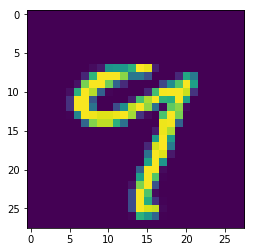

In [6]:
index = 154
plt.imshow(x_train[index])
print("label: ",y_train[index])

 In ce interval sunt datele

In [7]:
print("min pixelilor: ",np.min(x_train))
print("max pixelilor: ", np.max(x_train))

min pixelilor:  0
max pixelilor:  255


# Unroll the vectors

In [8]:
x_train = np.reshape(x_train, (x_train.shape[0],reshaped))
x_test = np.reshape(x_test, (x_test.shape[0],reshaped))

print("x_train.shape: ",x_train.shape)
print("x_test.shape: ",x_test.shape)

x_train.shape:  (60000, 784)
x_test.shape:  (10000, 784)


# Ensure Float and Normalize

In [9]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# normalize
x_train /= 255
x_test /= 255

print("min pixelilor: ",np.min(x_train))
print("max pixelilor: ", np.max(x_train))

min pixelilor:  0.0
max pixelilor:  1.0



# One-hot encoding

In [10]:
print("label: ",y_train[12])

label:  3


In [11]:
y_train = np_utils.to_categorical(y_train, nb_classes)
y_test = np_utils.to_categorical(y_test, nb_classes)

In [12]:
print("label: ",y_train[12])

label:  [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


# Create a Neral Network

In [13]:
model = Sequential()
model.add(Dense(nb_hidden_neurons_per_layer, input_shape=(reshaped,)))
model.add(Dense(nb_hidden_neurons_per_layer))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

# get some info
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1010      
_________________________________________________________________
activation_1 (Activation)    (None, 10)                0         
Total params: 89,610
Trainable params: 89,610
Non-trainable params: 0
_________________________________________________________________


# Compile the model

In [14]:
model.compile(loss='categorical_crossentropy', optimizer=optim, metrics=['accuracy'])

# Train the model

In [15]:
history = model.fit(x_train, y_train, batch_size=b_size, epochs=epoch, verbose=1, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 1s 29us/step - loss: 0.4120 - acc: 0.8804 - val_loss: 0.2914 - val_acc: 0.9199
Epoch 2/20
48000/48000 [==============================] - 1s 20us/step - loss: 0.3031 - acc: 0.9137 - val_loss: 0.2815 - val_acc: 0.9232
Epoch 3/20
48000/48000 [==============================] - 1s 18us/step - loss: 0.2888 - acc: 0.9192 - val_loss: 0.2950 - val_acc: 0.9165
Epoch 4/20
48000/48000 [==============================] - 1s 19us/step - loss: 0.2848 - acc: 0.9203 - val_loss: 0.2757 - val_acc: 0.9252
Epoch 5/20
48000/48000 [==============================] - 1s 17us/step - loss: 0.2783 - acc: 0.9210 - val_loss: 0.2829 - val_acc: 0.9227
Epoch 6/20
48000/48000 [==============================] - 1s 25us/step - loss: 0.2734 - acc: 0.9229 - val_loss: 0.2803 - val_acc: 0.9218
Epoch 7/20
48000/48000 [==============================] - 1s 19us/step - loss: 0.2713 - acc: 0.9241 - val_loss: 0.2774 - val_acc

# Predictions on the test data

In [16]:
score = model.evaluate(x_test, y_test)

10000/10000 [==============================] - 0s 22us/step


# Get the score and accuracy

In [17]:
print("score: ",score[0])
print("accuracy: ",score[1])

score:  0.2945468997657299
accuracy:  0.9222


# Find examples where the algo failed

In [20]:
y_pred = model.predict(x_test)

In [22]:
p = np.max(y_pred[0])

In [23]:
p

0.99952495

In [24]:
y_pred[0]

array([1.9210191e-07, 3.3515450e-14, 2.1387559e-07, 3.9731231e-04,
       3.7352446e-08, 1.8131169e-06, 7.5809557e-13, 9.9952495e-01,
       1.0034013e-06, 7.4384421e-05], dtype=float32)

In [35]:
# Plot
x_test_prim = x_test[0]
print("x_test_prim.shape: ",x_test_prim.shape)
img_usable = np.expand_dims(x_test_prim, axis=0)
print(img_usable.shape)
pred_prim = model.predict_classes(img_usable)
print("pred_prim: ",pred_prim)



x_test_prim.shape:  (784,)
(1, 784)
pred_prim:  [7]


In [36]:
y_pred = model.predict(x_test)

In [40]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [41]:
y_pred[0]

array([1.9210191e-07, 3.3515450e-14, 2.1387559e-07, 3.9731231e-04,
       3.7352446e-08, 1.8131169e-06, 7.5809557e-13, 9.9952495e-01,
       1.0034013e-06, 7.4384421e-05], dtype=float32)

In [57]:
puscat = np.where((np.argmax(y_pred, axis=1) != np.argmax(y_test, axis=1)))

In [58]:
puscat

(array([   8,   18,   66,   73,  149,  193,  211,  217,  233,  241,  245,
         247,  251,  259,  307,  318,  320,  321,  340,  344,  352,  359,
         362,  381,  406,  412,  425,  435,  445,  448,  469,  478,  479,
         488,  502,  507,  516,  528,  531,  536,  542,  543,  551,  565,
         569,  578,  582,  583,  591,  613,  619,  629,  659,  684,  691,
         692,  707,  717,  720,  728,  740,  741,  760,  791,  829,  830,
         839,  844,  857,  877,  881,  882,  890,  898,  924,  939,  947,
         950,  951,  956,  958,  965,  975,  999, 1003, 1012, 1014, 1017,
        1028, 1032, 1033, 1039, 1044, 1068, 1082, 1107, 1112, 1114, 1128,
        1152, 1181, 1182, 1191, 1192, 1194, 1198, 1200, 1204, 1206, 1217,
        1226, 1228, 1232, 1233, 1234, 1242, 1243, 1247, 1253, 1256, 1283,
        1289, 1299, 1310, 1319, 1325, 1326, 1337, 1364, 1378, 1393, 1410,
        1413, 1429, 1433, 1435, 1444, 1463, 1466, 1467, 1494, 1500, 1522,
        1525, 1527, 1530, 1549, 1553, 

x_test_prim.shape:  (784,)
(1, 784)
pred_prim:  [7]


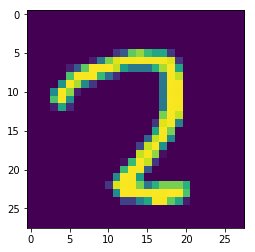

In [62]:
index = 362

x_test_prim = x_test[index]
print("x_test_prim.shape: ",x_test_prim.shape)
img_usable = np.expand_dims(x_test_prim, axis=0)
img_to_show = np.reshape(x_test_prim, (28,28))
plt.imshow(img_to_show)
print(img_usable.shape)
pred_prim = model.predict_classes(img_usable)
print("pred_prim: ",pred_prim)

In [50]:
y_pred.shape

(10000, 10)